# Fashion MNIST
*   Fashion-MNIST is a dataset of Zalando article images consisting of a training set of 60,000 examples and a testing set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes.
*   Goal: classify grayscale Fashion-MNIST images into 10 classes.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import activations # Import activations from tensorflow.keras
from keras import models # Import models from tensorflow.keras
from keras import layers # Import layers from tensorflow.keras
from keras import optimizers # Import optimizers from tensorflow.keras


import numpy as np
import matplotlib.pyplot as plt
import random
print(f"Tensorflow: {tf.__version__}\nKeras: {keras.__version__}")

Tensorflow: 2.18.0
Keras: 3.7.0


# 1. Load Data



In [ ]:
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

In [ ]:
type(x_train), type(y_train)

(numpy.ndarray, numpy.ndarray)

In [ ]:
x_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [ ]:
x_train.dtype, y_train.dtype

(dtype('uint8'), dtype('uint8'))

In [ ]:
y_train[0]

9

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
class_nums = len(class_names)
print(f"Number of classes: {class_nums}")

Number of classes: 10


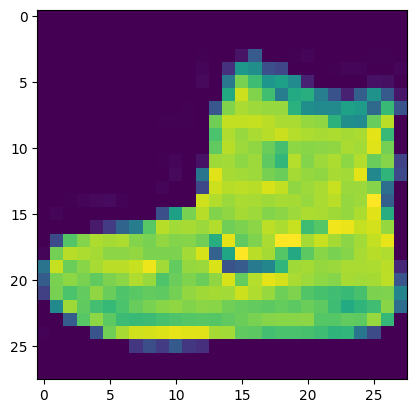

In [ ]:
plt.imshow(x_train[0])

In [ ]:
from typing import Optional
import numpy as np
import matplotlib.pyplot as plt
import random
def plot_data(x_data:np.ndarray, y_data:np.ndarray,
              y_proba:Optional[np.ndarray]=None)->None:
  nrows, ncols = 2, 4
  fig, axes = plt.subplots(nrows, ncols, figsize=(8, 4))
  len_x = x_data.shape[0]
  for idx in range(nrows*ncols):
    ax = axes[idx//ncols, idx%ncols]

    img_idx = random.randint(0, len_x)

    ax.imshow(x_data[img_idx], cmap='gray')
    ax.set(xticks=[], yticks=[])
    color = "green"
    true_lable_str = f"True: {class_names[y_data[img_idx]]}"

    # Assign img_title before the if statement
    img_title = true_lable_str

    if y_proba is not None:
      pred_idx = np.argmax(y_proba[img_idx])
      pred_label = class_names[pred_idx]
      color = "red" if pred_idx != y_data[img_idx] else color
      pred_lable_str = f"\nPredicted: {pred_label}"

      # Concatenate to img_title if y_proba is not None
      img_title += pred_lable_str

    ax.set_xlabel(img_title, color = color, fontsize = 12)
  plt.tight_layout()
  plt.show()
plot_data(x_train, y_train)

# 2. Image Pre-processing





In [ ]:
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

In [ ]:
x_train.dtype, x_test.dtype

(dtype('float32'), dtype('float32'))

In [ ]:
x_train.shape, x_test.shape

((60000, 28, 28), (10000, 28, 28))

In [ ]:
x_test = np.expand_dims(x_test, axis=-1)
x_train = np.expand_dims(x_train, axis=-1)

In [ ]:
# convert class vectors to binary class matricies: 1->[0 1 0 0 ....]
y_train_label = keras.utils.to_categorical(y_train, class_nums)
y_test_label = keras.utils.to_categorical(y_test, class_nums)

# 3. Network (ANN) Architecture

In [ ]:
input_shape = (28, 28, 1)

In [ ]:
# Định nghĩa mô hình Sequential
model = keras.models.Sequential([
    layers.Flatten(input_shape=input_shape),  # (28, 28, 1) -> 1D (784)
    layers.Dense(512, activation='relu'),
    layers.Dense(256, activation='relu'),
    layers.Dense(class_nums, activation='softmax')
])

# Hiển thị tóm tắt mô hình
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 512)                 │         401,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 535,818 (2.04 MB)

 Trainable params: 535,818 (2.04 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
epochs = 10
batch_size = 256
history = model.fit(x_train, y_train_label,
                    epochs=epochs,
                    batch_size=batch_size,
                    validation_split=0.1)

Epoch 1/10
211/211 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - accuracy: 0.6858 - loss: 0.8796 - val_accuracy: 0.8047 - val_loss: 0.5334
Epoch 2/10
211/211 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - accuracy: 0.8371 - loss: 0.4343 - val_accuracy: 0.8417 - val_loss: 0.4424
Epoch 3/10
211/211 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - accuracy: 0.8642 - loss: 0.3675 - val_accuracy: 0.8668 - val_loss: 0.3700
Epoch 4/10
211/211 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - accuracy: 0.8766 - loss: 0.3312 - val_accuracy: 0.8617 - val_loss: 0.3821
Epoch 5/10
211/211 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - accuracy: 0.8866 - loss: 0.3073 - val_accuracy: 0.8748 - val_loss: 0.3386
Epoch 6/10
211/211 ━━━━━━━━━━━━━━━━━━━━ 9s 20ms/step - accuracy: 0.8893 - loss: 0.2911 - val_accuracy: 0.8770 - val_loss: 0.3329
Epoch 7/10
211/211 ━━━━━━━━━━━━━━━━━━━━ 7s 27ms/step - accuracy: 0.8979 - loss: 0.2719 - val_accuracy: 0.8858 - val_loss: 0.3285
Epoch 8/10
211/211 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - accuracy: 0.9032 - loss: 0.2578 - val_accu

In [ ]:
history_dict = history.history
history_dict.keys()
train_loss, val_loss = history_dict['loss'], history_dict['val_loss']
train_acc, val_acc = history_dict['accuracy'], history_dict['val_accuracy']

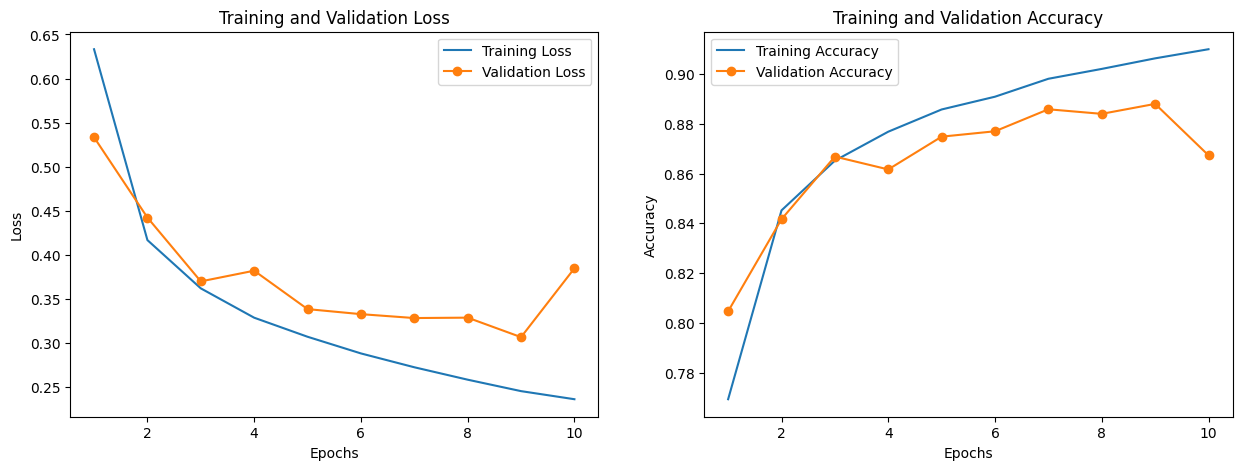

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
epochs_runs = [i+1 for i in range(epochs)]

ax1.plot(epochs_runs,train_loss, label='Training Loss')
ax1.plot(epochs_runs,val_loss, label='Validation Loss', marker='o')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.set_title('Training and Validation Loss')
ax1.legend()

ax2.plot(epochs_runs,train_acc, label='Training Accuracy')
ax2.plot(epochs_runs,val_acc, label='Validation Accuracy', marker='o')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.set_title('Training and Validation Accuracy')
ax2.legend()
plt.show()

# 4. Model Evaluation

In [ ]:
score = model.evaluate(x_test, y_test_label)
print(f"Test loss: {score[0]:.4f}")
print(f"Test accuracy: {score[1]:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8596 - loss: 0.4071
Test loss: 0.4004
Test accuracy: 0.8638


# 5. Prediction

In [ ]:
x_sample=x_test[:3] # lấy ra 3 sample trong test
y_proba=model.predict(x_sample) # dự đoán xác suất của 3 sample

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


In [ ]:
y_proba.round(3)

array([[0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.004, 0.   ,
        0.996],
       [0.   , 0.   , 1.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   ],
       [0.   , 1.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   ]], dtype=float32)

In [ ]:
prediction=np.argmax(y_proba, axis=1) # lấy ra nhãn dự đoán
[class_names[pred] for pred in prediction]

['Ankle boot', 'Pullover', 'Trouser']

In [ ]:
y_proba=model.predict(x_test)
plot_data(x_test, y_test, y_proba)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
